<div class="alert alert-block alert-info" >
    <h1>Machine Learning: Assignment 5</h1>
    <h2>This is a three week assignment</h2>
    <h3>General Information:</h3>
    <p>Feel free to add cells if required.<br> Feel free to write your own function block to reduce the redundancy.<br> Answers belong into the corresponding cells (below the question). <br><br> If you encounter empty cells underneath the answer that can not be edited, please ignore them, they are for testing purposes.<br><br>When editing an assignment there can be the case that there are variables in the kernel. To make sure your assignment works, please restart the kernel and run all cells before submitting (e.g. via <i>Kernel -> Restart & Run All</i>). We don't consider that respective solution if you make this mistake (no excuse).</p>
    <br><br><b> Plot should have axis labels, grid, legend, title, atleast size 10X10 also give proper comments, function name, variable names to your coding, if you didn't follow the instructions there will be a reduction in the points.</b><br><br> 
     <br><br><b> Write sudo-code if you didn't get output or left out of time so that you will be awarded with atmost 50% of marks for that particular session.</b><br><br>
    <h3>Submission:</h3>
    <p>Use the following naming convention for your submissions: LA_FirstnameLastname_dateOfLecture, e.g LA_JohnDoe_YYMMDD
     <br><br>Please submit your notebook via LEA. The assignment is due on <b>$12^{th}$ June, Saturday at 18:00.</b> </p>
    <h3>Group Work:</h3>
    <p>You are allowed to work in groups of up to two people. Please enter the UID (your username here) of each member of the group into the next cell. We apply plagiarism checking, so do not submit solutions from other people except your team members. If an assignment has a copied solution, the task will be graded with 0 points for all people with the same solution.</p>
    <p><b>YOU SHOULD ONLY SUBMIT EXACTLY ONE PER GROUP</b></p>
    <h3>Questions about the Assignment:</h3>
    <p>If you have questions about the assignment please post them in the LEA forum before the deadline. Don't wait until the last day to post questions.</p></div>

In [1]:
'''
Group Work:
Enter the UID (i.e. student2s) of each team member into the variables. 
If you work alone please leave the second variable empty, or extend the list if necessary.
'''
member1 = 'sdeuss2s'
member2 = 'mhelap2s'

# Ensembles  [100 points]

### Foundation pen dataset  
1. The dataset provided consists of 8 classes (folder name) each classes contains 48 files of 30 observations each.
2. Total of 12 pens are tested in 4 nest combination with three different velcity (3.4m, 4.5m and 9.0m).
3. Each nest has 30 observations.
4. The files consists of features and not the raw data.

#### Note:- You don't need to watch the Lecture slide 7, 8, 9 to solve this but to understand whats happening you should go through it.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy import stats
import sklearn
#Import other libraries here


from os import listdir
from os.path import isdir, isfile, join
from typing import NamedTuple
import seaborn as sns

import csv


## Task 1: Preprocessing [35 points]

### 1. Load the data and display. Below the code cell write the adaboost algorithm (Just the 4 steps, no need explanation)[5 points]

**Write the algorithm here**

### 2. Extract the data [20 points]
- Extract the data based on velocity 4.5m.
- You should crawl into all the folder and combine only the data/file of velocity 4.5m for each class along with the class label.
- Remove the insignificant columns (should have 46 column including the class label)
- Display as pandas table

In [3]:
Observation = NamedTuple("Observation", 
                         path=str, file_name=str, df=pd.DataFrame, 
                         class_=str, nest=int, configuration=str)
    
def extract_data(path, *, velocity="4,5m") -> pd.DataFrame:
    """
    Loads all csv files from a given directory. Differentiates based on velocity in file name.
    Returned dataframe will contain additional information parsed from the file name - configuration and nest.
    """
    observations = []

    for folder in listdir(path):
        if isdir(join(path, folder)):
            for file_name in listdir(join(path, folder)):
                path_to_file = join(path, folder, file_name)
                if isfile(path_to_file) and file_name.lower().endswith(".csv") and velocity in file_name:

                    # extracts additional info from file name: G 2-3-4-1 - 4,5m - Nest-1.CSV
                    # nasty, but gets the job done the easiest way
                    class_, configuration, _, _, _, nest = file_name.split(" ")
                    nest = nest.split(".")[0]
                    nest = configuration.split("-")[1]

                    with open(path_to_file) as f:
                        reader = csv.reader(f, delimiter=";")

                        rows = list(reader)
                        for row in rows:
                            for index, entry in enumerate(row):
                                try:
                                    replaced = entry.replace(",", ".")
                                    row[index] = float(replaced)
                                    assert isinstance(row[index], float)

                                except Exception as e:
                                    row[index] = None
                    df = pd.DataFrame(rows)

                    df.drop([46, 47, 48], axis=1, inplace=True)
                    rename_dict = {index:f"feature_{index}" for index in df.columns}
                    df.rename(columns = rename_dict, inplace = True)

                    df["class"] = class_
                    df["configuration"] = configuration
                    df["nest"] = nest
                    
        
                    observations.append(
                        Observation(
                            path=path_to_file,
                            file_name=file_name,
                            df=df,
                            class_=class_, nest=nest, configuration=configuration)
                    )

    print(f"Read {len(observations)} csv files from the folder 'dataset'")
    
    
    df =  pd.concat([o.df for o in observations])
    return df.reset_index(drop=True)
    
    


df = extract_data("./dataset/")

df

Read 112 csv files from the folder 'dataset'


,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,...,feature_39,feature_40,feature_41,feature_42,feature_43,feature_44,feature_45,class,configuration,nest
0,2.355,4.625,0.845,1.904,2.355,4.625,0.201,0.398,0.584,1.251,...,0.032,29.983,39.121,258.377,336.474,23.861,26.874,H,2-3-4-1,3
1,2.183,2.397,1.483,2.397,2.183,1.492,0.057,0.083,0.549,0.615,...,0.006,29.133,33.518,255.170,287.766,19.013,21.032,H,2-3-4-1,3
2,1.873,2.993,1.873,2.993,1.151,2.380,0.177,0.177,0.688,0.977,...,0.004,30.012,33.895,283.782,295.578,22.808,22.910,H,2-3-4-1,3
3,1.938,4.815,1.938,4.815,1.781,3.622,0.238,0.305,0.591,1.462,...,0.012,34.265,41.386,282.154,428.175,25.565,27.868,H,2-3-4-1,3
4,1.898,3.195,1.865,2.472,1.898,3.195,0.083,0.104,0.768,1.018,...,0.003,32.849,40.161,298.587,552.874,20.794,23.579,H,2-3-4-1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3355,2.140,5.735,1.886,4.474,2.140,5.735,0.063,0.068,0.896,1.570,...,0.001,32.804,47.396,292.274,511.901,18.612,24.779,NMGR,1-2-3-4,2
3356,2.756,2.767,1.491,2.030,2.756,2.767,0.167,0.145,0.815,1.186,...,0.004,29.672,32.191,231.382,275.824,25.151,23.635,NMGR,1-2-3-4,2
3357,4.798,9.111,3.746,5.109,4.798,9.111,0.133,0.127,1.953,2.319,...,0.002,37.175,51.089,300.560,493.439,21.222,25.465,NMGR,1-2-3-4,2
3358,5.540,6.501,1.520,6.202,5.540,6.501,0.064,0.107,1.331,3.071,...,0.009,32.049,53.198,283.391,744.954,17.904,24.517,NMGR,1-2-3-4,2


### 3. Correlation [10 points]
- Check the correlation between the features. 

**Hint:** 
1. Use sklearn library to see correlation between features or 
2. Reduce the dimensions using PCA/t-SNE to 3D/2D and then visualize

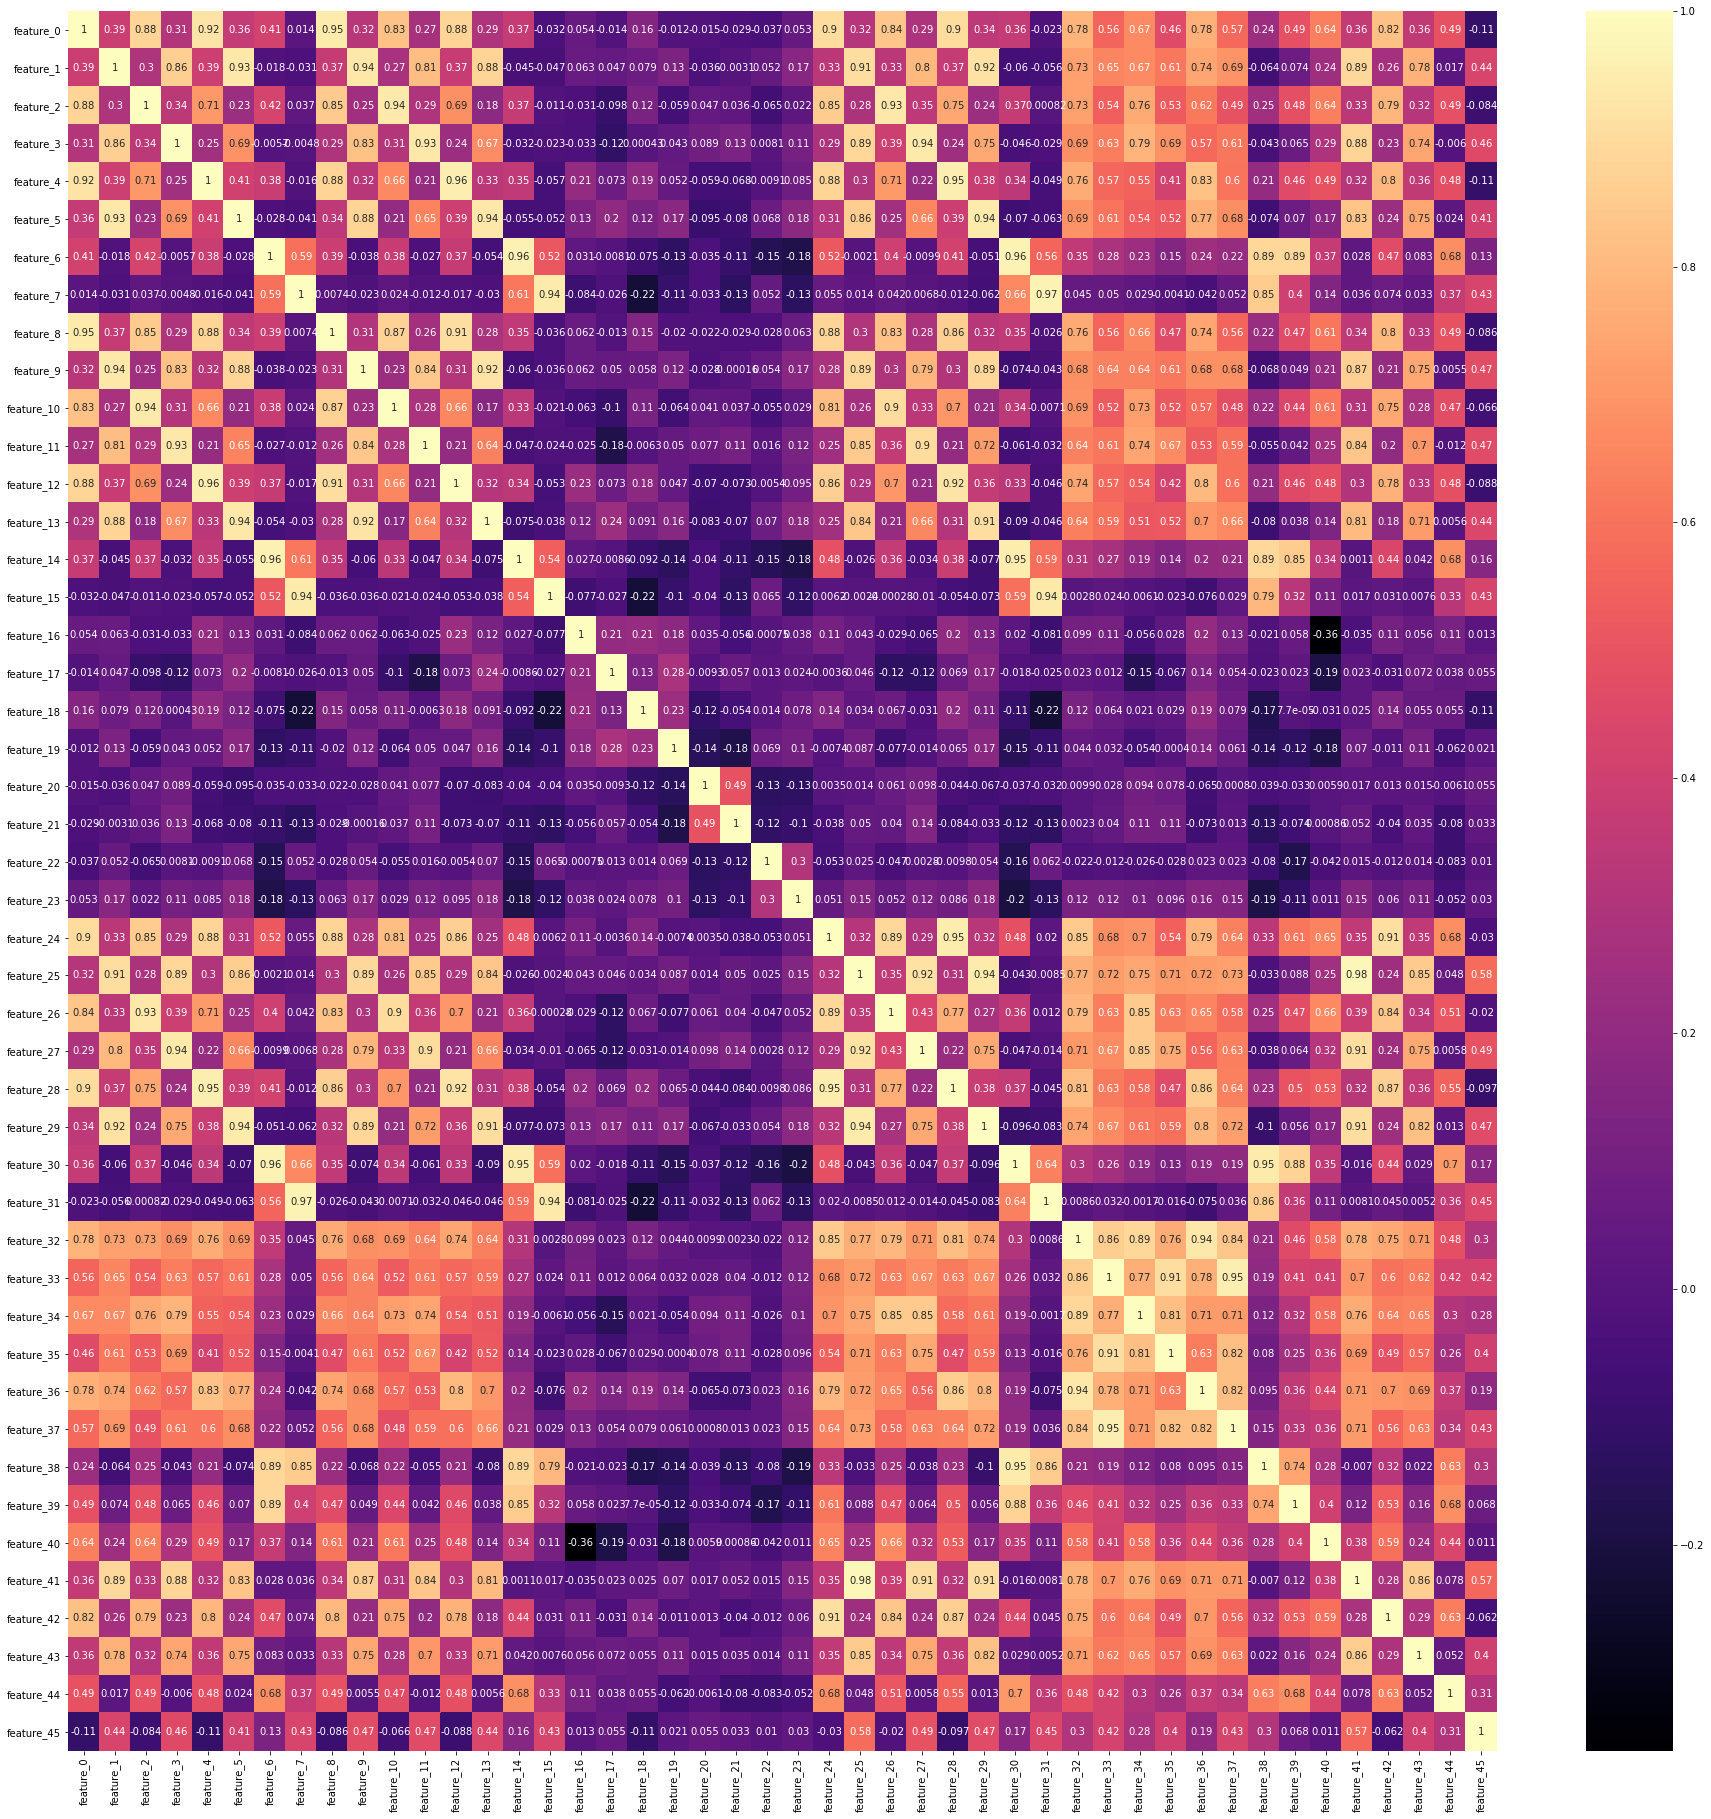

In [73]:
plt.figure(figsize=(32,32))
cor = df[df.columns[:-3]].corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.magma)
plt.show()

## Task 2: Ensemble Method [30 points]

###  Apply the methods using sklearn library  

- Split the data into training and testing sets (80-20%) 
- Train and test the model (have n_estimator = 100) for 
    - AdaBoost[15 points] 
    - Random Forest [15 points]


Splitted data with 3360 rows into sets with 2688 rows for training and 672 for testing
Fitting AdaBoostClassifier with 100 estimators


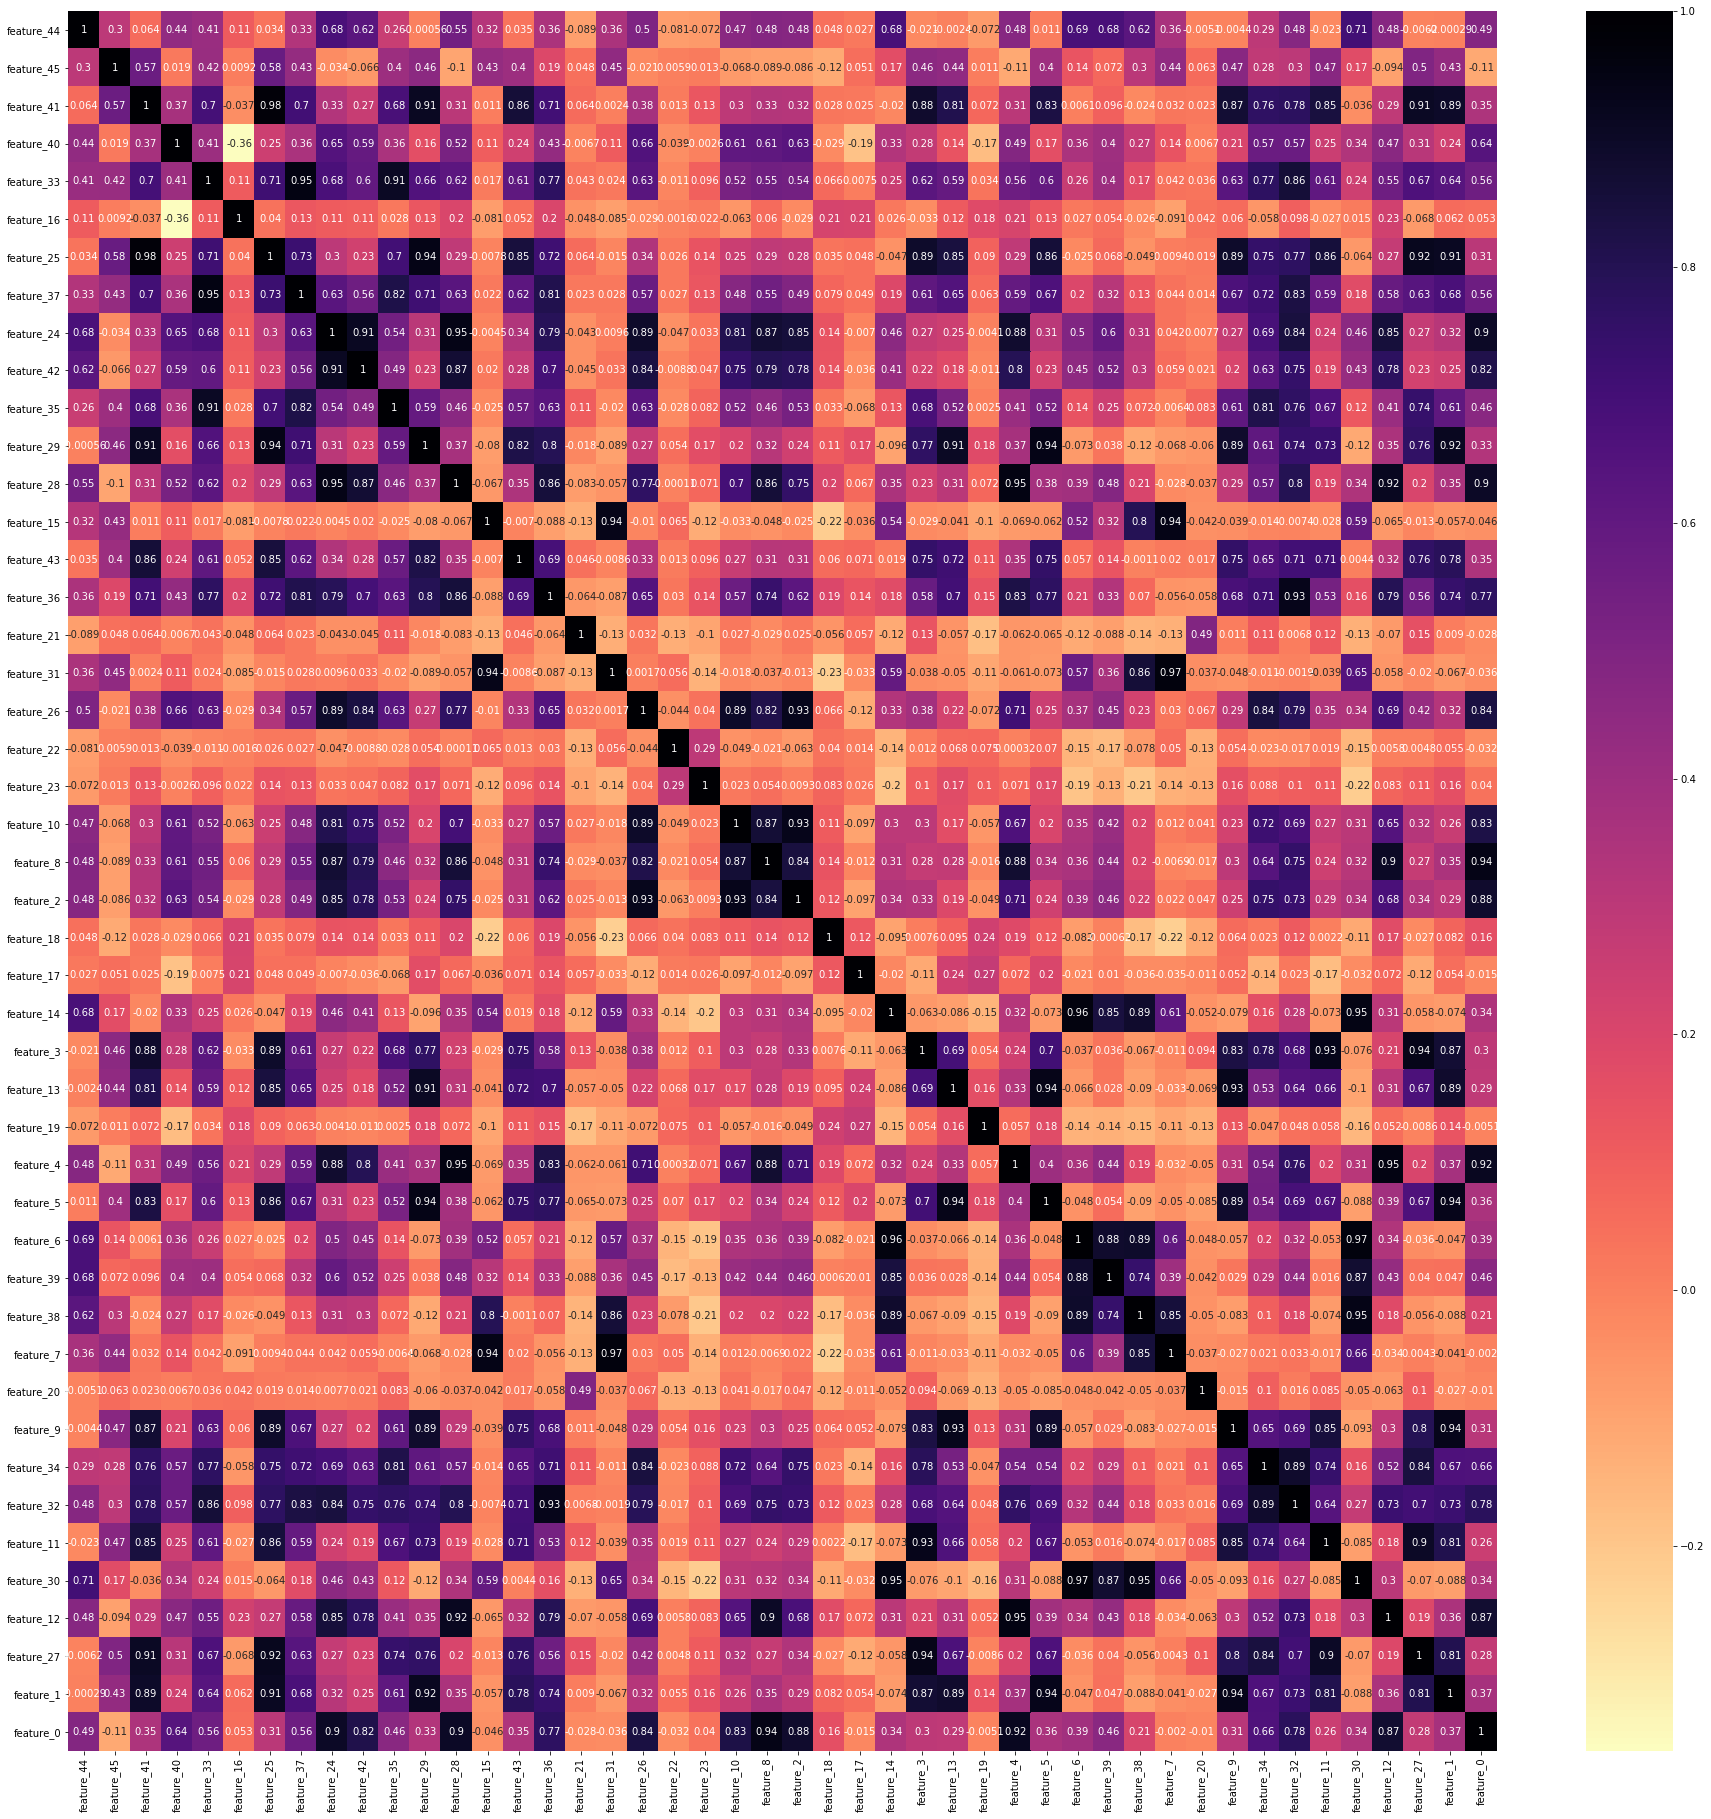

Fitting RandomForrestClassifier with 100 estimators


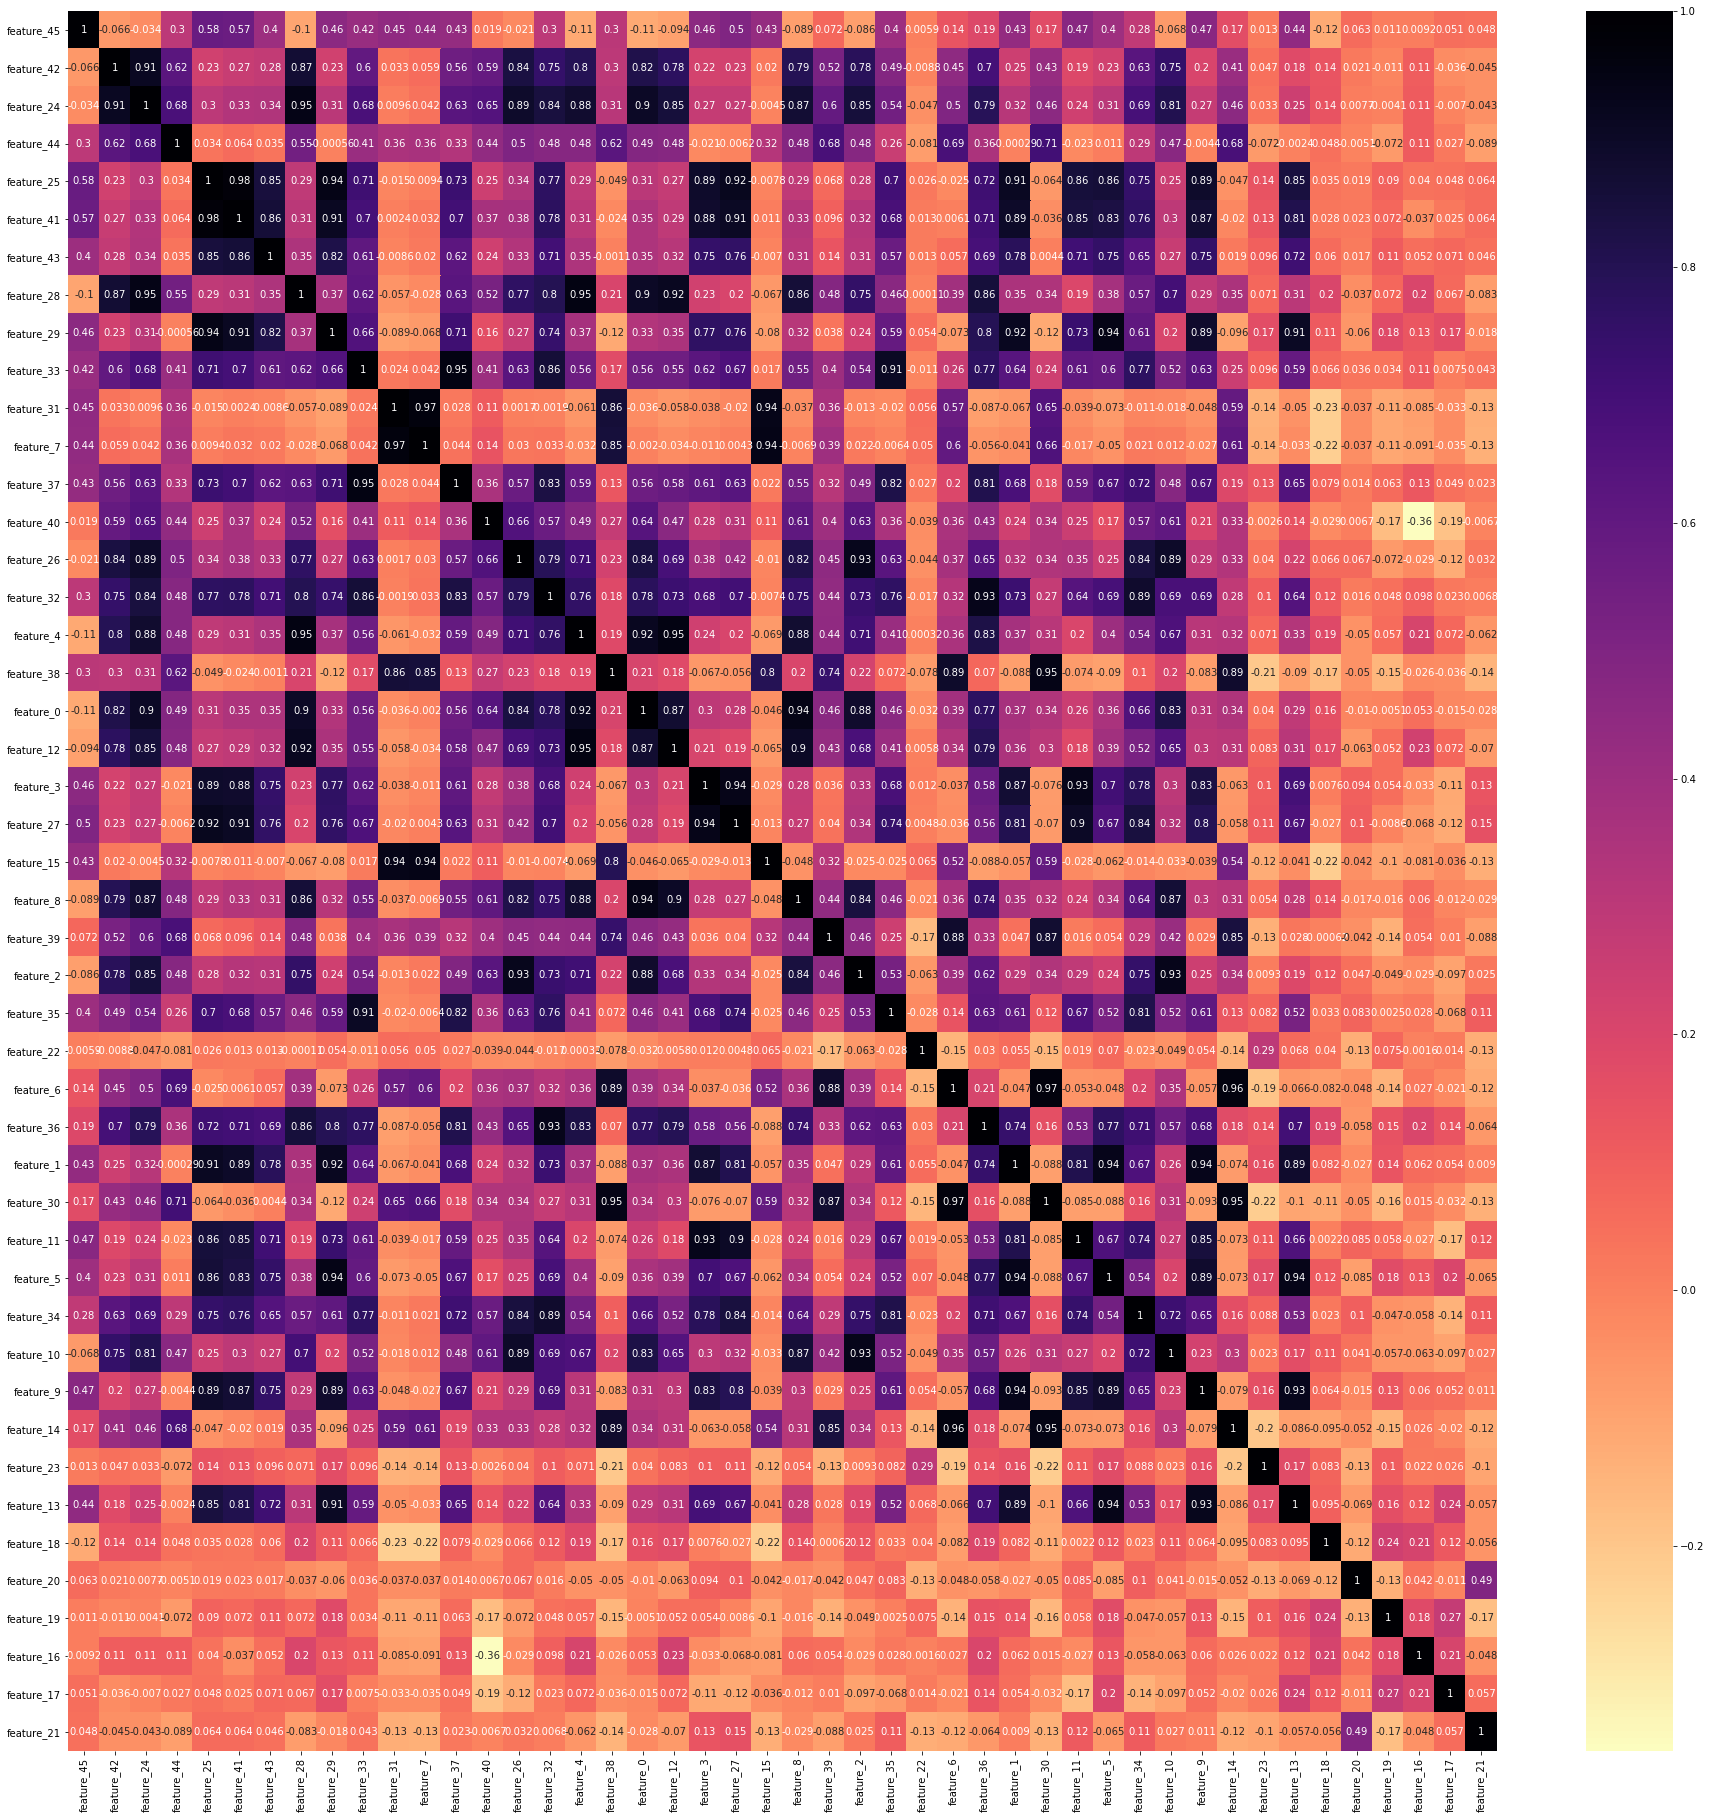

In [102]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.base import BaseEstimator

def ada_boost(data: pd.DataFrame, 
              label: pd.DataFrame, 
              *, n_estimators: int = 100, 
              display_weights=True) -> BaseEstimator:
    
    classifier = AdaBoostClassifier(n_estimators=n_estimators)
    print(f"Fitting AdaBoostClassifier with {n_estimators} estimators")
    classifier.fit(data, label.values.ravel())
    
 
    if display_weights:
        weights = pd.DataFrame(classifier.feature_importances_)
        weights.rename(columns = {0: "weight"}, inplace = True)
        weights.sort_values("weight", inplace=True, ascending=False)

        order = [f"feature_{index}" for index in weights.index]

        plt.figure(figsize=(32,32))
        correlation = data[order].corr()
        sns.heatmap(correlation, annot=True, cmap=plt.cm.magma_r)
        plt.show()

    return classifier


def random_forest(data: pd.DataFrame, 
                  label: pd.DataFrame, 
                  *, n_estimators: int = 100, 
                  display_weights=True) -> BaseEstimator:
    
    classifier = RandomForestClassifier(n_estimators=n_estimators)
    print(f"Fitting RandomForrestClassifier with {n_estimators} estimators")
    classifier.fit(data, label.values.ravel())  
 
    if display_weights:
        weights = pd.DataFrame(classifier.feature_importances_)
        weights.rename(columns = {0: "weight"}, inplace = True)
        weights.sort_values("weight", inplace=True, ascending=False)

        order = [f"feature_{index}" for index in weights.index]

        plt.figure(figsize=(32,32))
        correlation = data[order].corr()
        sns.heatmap(correlation, annot=True, cmap=plt.cm.magma_r)
        plt.show()

    return classifier


data = df[df.columns[:-3]]
labels = df[df.columns[-3:-2]]

data_train, data_test, label_train, label_test = train_test_split(data, labels, test_size=0.2, shuffle=True)

print(f"Splitted data with {len(df)} rows into sets with {len(label_train)} rows for training and {len(data_test)} for testing")


ab_classifier = ada_boost(data_train, label_train)
rf_classifier = random_forest(data_train, label_train)


##  Task 3: Evaluate the results [10 points]

- Print the following for both adaboost and random forest [10 points]
    - Accuracy (test)
    - Classification report
    - Confusion matrix as heatmap
      
- Which performed well adaboost or random forest? why? (answer below the code)[5 points]
 

************************************************** 
Classification report ada boost classifier 

              precision    recall  f1-score   support

         FVL       0.81      0.71      0.76       107
         FVR       0.78      0.76      0.77        91
           G       0.47      0.57      0.51        76
           H       0.47      0.38      0.42       124
          KS       0.49      0.46      0.47       103
        NMGL       0.53      0.61      0.56        79
        NMGR       0.44      0.53      0.48        92

    accuracy                           0.56       672
   macro avg       0.57      0.57      0.57       672
weighted avg       0.57      0.56      0.57       672

************************************************** 
Accuracy ada boost classifier 

0.5639880952380952 

************************************************** 
Confusion Matrix ada boost classifier 



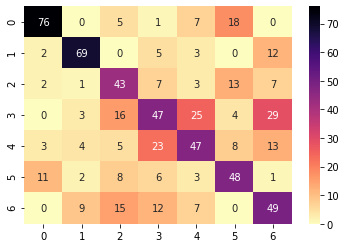

************************************************** 
Classification report random forrest classifier 

              precision    recall  f1-score   support

         FVL       0.95      0.97      0.96        92
         FVR       0.90      0.91      0.90        87
           G       0.83      0.88      0.85        86
           H       0.69      0.74      0.72        94
          KS       0.83      0.77      0.80       103
        NMGL       0.92      0.93      0.93        90
        NMGR       0.82      0.76      0.79       120

    accuracy                           0.85       672
   macro avg       0.85      0.85      0.85       672
weighted avg       0.85      0.85      0.84       672

************************************************** 
Accuracy random forrest classifier 

0.8452380952380952 

************************************************** 
Confusion Matrix random forrest classifier 



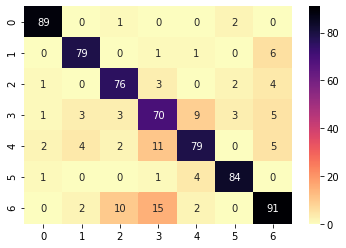

In [103]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
    
def evaluation(predict: np.array, test_label: pd.DataFrame, *, title: str):
    
    print("*"*50, f"\nClassification report {title}", "\n")
    
    print(classification_report(predict, test_label))
    
    print("*"*50, f"\nAccuracy {title}", "\n")
    
    print(accuracy_score(predict, test_label), "\n")
    
    print("*"*50, f"\nConfusion Matrix {title}", "\n")
    
    
    confusion = confusion_matrix(predict, test_label)
    sns.heatmap(confusion, annot=True, cmap=plt.cm.magma_r)
    plt.show()
    
   
    

ab_predictions = ab_classifier.predict(data_test)
rf_predictions = rf_classifier.predict(data_test)

evaluation(ab_predictions, label_test, title="ada boost classifier")
evaluation(rf_predictions, label_test, title="random forrest classifier")


**Write the answer here**

## Task 4: Complexity curve [15 points]
- Plot the complexity curve for aacuracy score for 200 tree number [Refer lecture slide 9]
    - Adaboost for test and train [10 points]
    - Random forest for test and train [10 points]
    
Note:- This may take a lot of time and RAM kindly do it in google Colab if the laptop doesn't have GPU

In [28]:
def complexity_curve(data, label, tree_number):
    # code here
    return

## Task 5: Is your code generic? [10 points]
- If need to perform the above operations but the extraction based on nest-3 will it do if the file name alone is changed?

In [ ]:
filename = None
data = extract_data(filename)
predict, test_label = randomforest(data, label)
evaluation(predict, test_label)
complexity_curve(data, label, tree_number)